In [125]:
import zipfile

from PIL import Image,ImageDraw,ImageFont
import pytesseract
import cv2 as cv
import numpy as np
import math
from IPython.display import display
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_face.xml')
#1 lets iterate through the images in the zip file
#2 lets try to pytessaract it and load each pictures text in a dictionary of lists where lists are the values and 
## images are the keys
#3 lets opencv the images on by one if there are faces inside of themand crop out the pictures of faces
#4 lets create aconact sheet 500 width and height scalablebased on the count of the items returnd by the opencv function 
## (if len opencv/5
#5 lets fill in the contact sheet with faces foud by our pencv function 
#6 if the picture contains text aka if something is returned by the tesseract function and the opencv function returns
## face images for the text containedimage
"""HERE ARE MY STARTING IDEAS AND IF YOU ARE WONDERING WWHY I DID IT ON MY OWN PC BECAUSE IT IS A LOT FASTER THAN THOSE
COURSERA SERVERSG"""

In [158]:
#function for the zipfile eextraction
def zipfile_extrct(zipf):
    #aaccumulator list for the images in zip file
    images=[]
    filenames=[]
    # https://docs.python.org/3/library/zipfile.html
    with zipfile.ZipFile(zipf) as myzip:
        for img in myzip.infolist():
            #https://stackoverflow.com/questions/21357184/using-python-opencv-to-load-image-from-zip
            data=myzip.read(img)
            image=cv.imdecode(np.frombuffer(data,np.uint8),1)
            images.append(image)
            filenames.append(img.filename)
    return images,filenames
images,filenames=zipfile_extrct("images.zip")
pil_images_bw=[]
pil_images=[]
opencv_ver_imgs=[]
for image in images:
    pil_img_bw=Image.fromarray(cv.cvtColor(image,cv.COLOR_BGR2GRAY),"L")
    pil_img=Image.fromarray(cv.cvtColor(image,cv.COLOR_BGR2RGB),"RGB")
    opencv_ver_img=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    pil_images_bw.append(pil_img_bw)
    pil_images.append(pil_img)
    opencv_ver_imgs.append(opencv_ver_img)

In [23]:
def str_from_images(pil_images_bw):
    #extractng the ocred version from the images
    strings_from_images=[]
    for image in pil_images_bw:
        str1=pytesseract.image_to_string(image)
        strings_from_images.append(str1)
    return strings_from_images
# help(pytesseract.image_to_string)
strings_from_images=str_from_images(pil_images_bw)

In [76]:
def facial_rec(opencv_imgs):
    faces=[]
    i=0
    for cv_img in opencv_imgs:
        faces.append((face_cascade.detectMultiScale(cv_img,1.5)))
    return faces
faces=facial_rec(opencv_ver_imgs)    

In [78]:
def get_faces(faces:list,pil_images:list)->list:
    faces_colored=[]
    for i,face in enumerate(faces):
        faces_list=[]
        for x,y,w,h in face:
            newimage=pil_images[i].crop((x,y,x+w,y+h))
            faces_list.append(newimage)
        faces_colored.append(faces_list)
    return faces_colored
faces_colored=get_faces(faces,pil_images)

In [206]:

"""I TRIED TO REMOVE THE TEXT FROM THE PICTURES, HELL I EVEN TRIED TO DO THE FACIAL RECOGNITION TWICE
Then i searched for this on the forums then found out that 1.5 scalefactor should do it XD (2 days of trying)"""
def hope_the_rest(faces_colored,filenames,strings_from_images,word="Mark"):
    font=ImageFont.truetype(r"C:\Users\ALI-Gsus\anaconda3\envs\py3env\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf",16)
    d={}
    width=500
    height=100
    height_of_text=25
    for i, file in enumerate(filenames):
            d[file]=faces_colored[i]
            
    contact_sheets=[]
    for i,(k,v) in enumerate(d.items()):
        
        if word in strings_from_images[i]:
            contact_sheet2=Image.new("RGB",color=(255,255,55),size=(width,height_of_text))
            drawing=ImageDraw.Draw(contact_sheet2)
            drawing.text((0,height_of_text/3),f"Results found in file {filenames[i]}",fill=(0,0,0),font=font)

            if math.ceil(len(v)/5)==2:
                height+=100
                
            if len(v)>0:
                x=0
                y=0
                contact_sheet=Image.new("RGB",(width,height))
                height=100
                for img in v:
                    img.thumbnail((100,100))
                    contact_sheet.paste(img, (x, y) )

                    if x+100 == contact_sheet.width:
                        x=0
                        y=y+100
                    else:
                        x=x+100
            else:
                contact_sheet=Image.new("RGB",(width,height_of_text),color=(255,255,55))
                drawing=ImageDraw.Draw(contact_sheet)
                drawing.text((0,height_of_text/3),"But there were no faces in that file!",fill=(0,0,0),font=font)



            contact_sheets.append([contact_sheet2,contact_sheet])

    return contact_sheets

In [207]:
def thats_it(faces_colored,filenames,strings_from_images,word):
    contact_sheets=hope_the_rest(faces_colored,filenames,strings_from_images,word)
    cs_height=0
    css_height=0
    cs_width=500
    for contact_sheet in contact_sheets:
        for cs in contact_sheet:
            cs_height+=cs.height
    
#     print(cs_height)
    css=Image.new("RGB",(cs_width,cs_height))
    for contact_sheet in contact_sheets:
        for cs in contact_sheet:
            css.paste(cs,(0,css_height))
            css_height+=cs.height
    display(css)
    
            

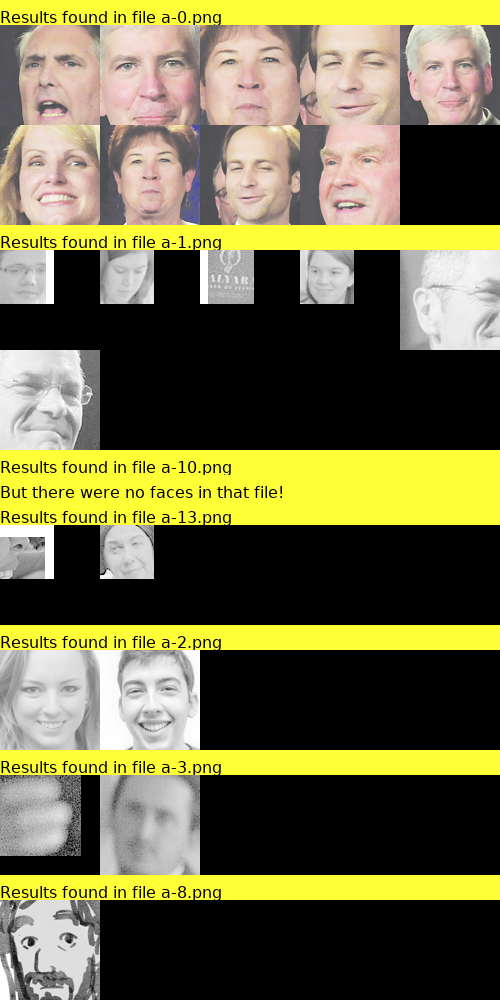

In [211]:
thats_it(faces_colored,filenames,strings_from_images,"Mark")

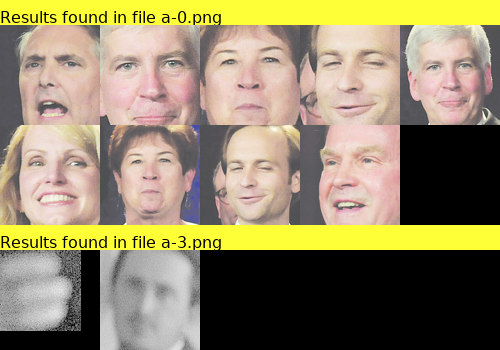

In [208]:
thats_it(faces_colored,filenames,strings_from_images,"Christopher")

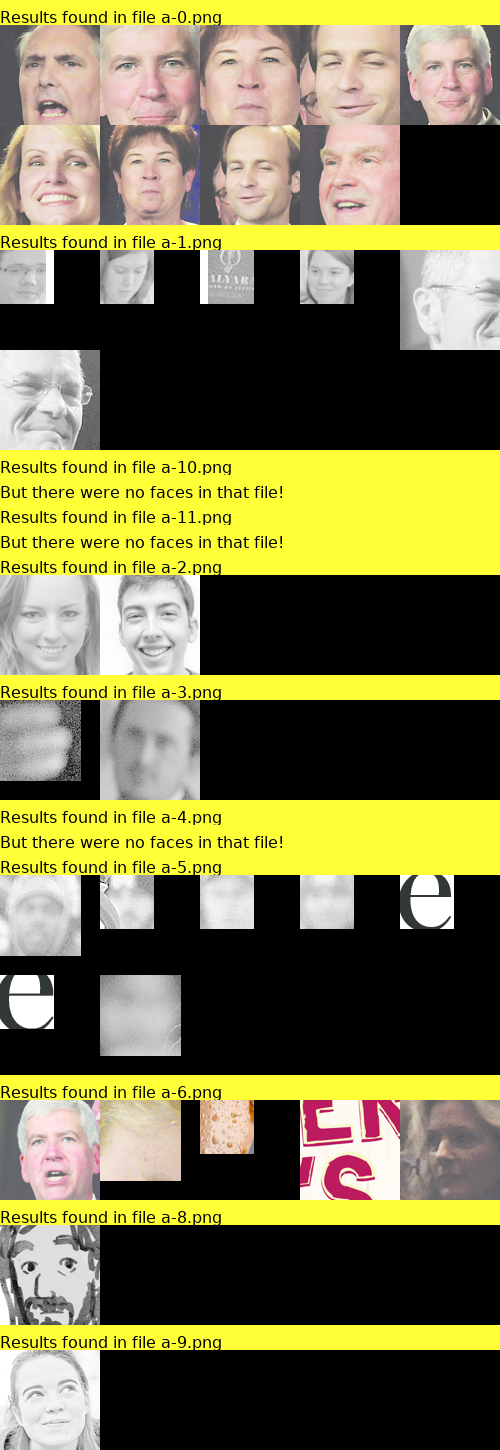

In [209]:
thats_it(faces_colored,filenames,strings_from_images,"Michigan")

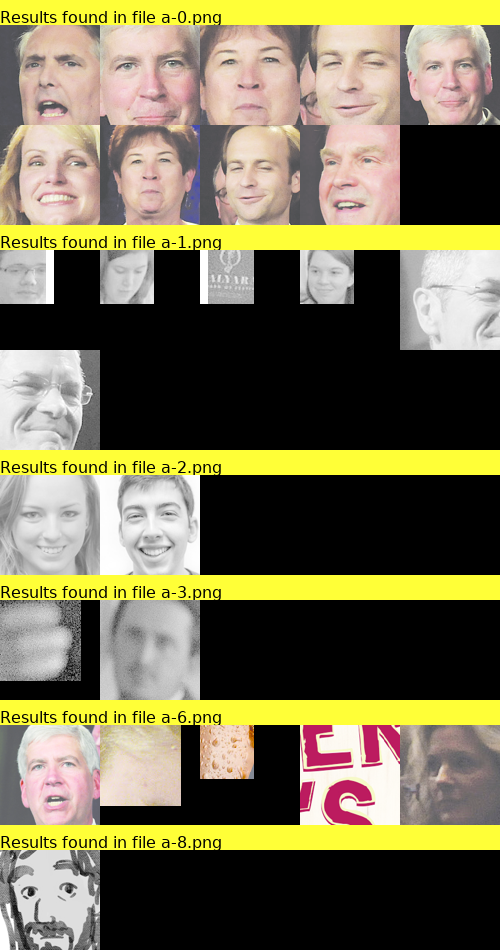

In [210]:
thats_it(faces_colored,filenames,strings_from_images,"Ann Arbor")